In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from pathlib import Path
from scikeras.wrappers import KerasClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
# Import training dataset
dataset = Path('../dataset')

df = pd.read_csv(dataset/'accidents_clean_train.csv')

df.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30,Slight Injury
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50,Slight Injury
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30,Serious Injury
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30,Slight Injury
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30,Slight Injury


In [4]:
%run ../custom/jc-functions.ipynb

# Decision Tree

Slight injury (2) vs Serious injury (1) vs Fatal injury (0)

Accuracy:  0.7840032480714576
Confusion Matrix:
 [[   7    3   14]
 [   1   84  229]
 [  14  271 1840]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.29      0.30        24
           1       0.23      0.27      0.25       314
           2       0.88      0.87      0.87      2125

    accuracy                           0.78      2463
   macro avg       0.48      0.48      0.48      2463
weighted avg       0.80      0.78      0.79      2463



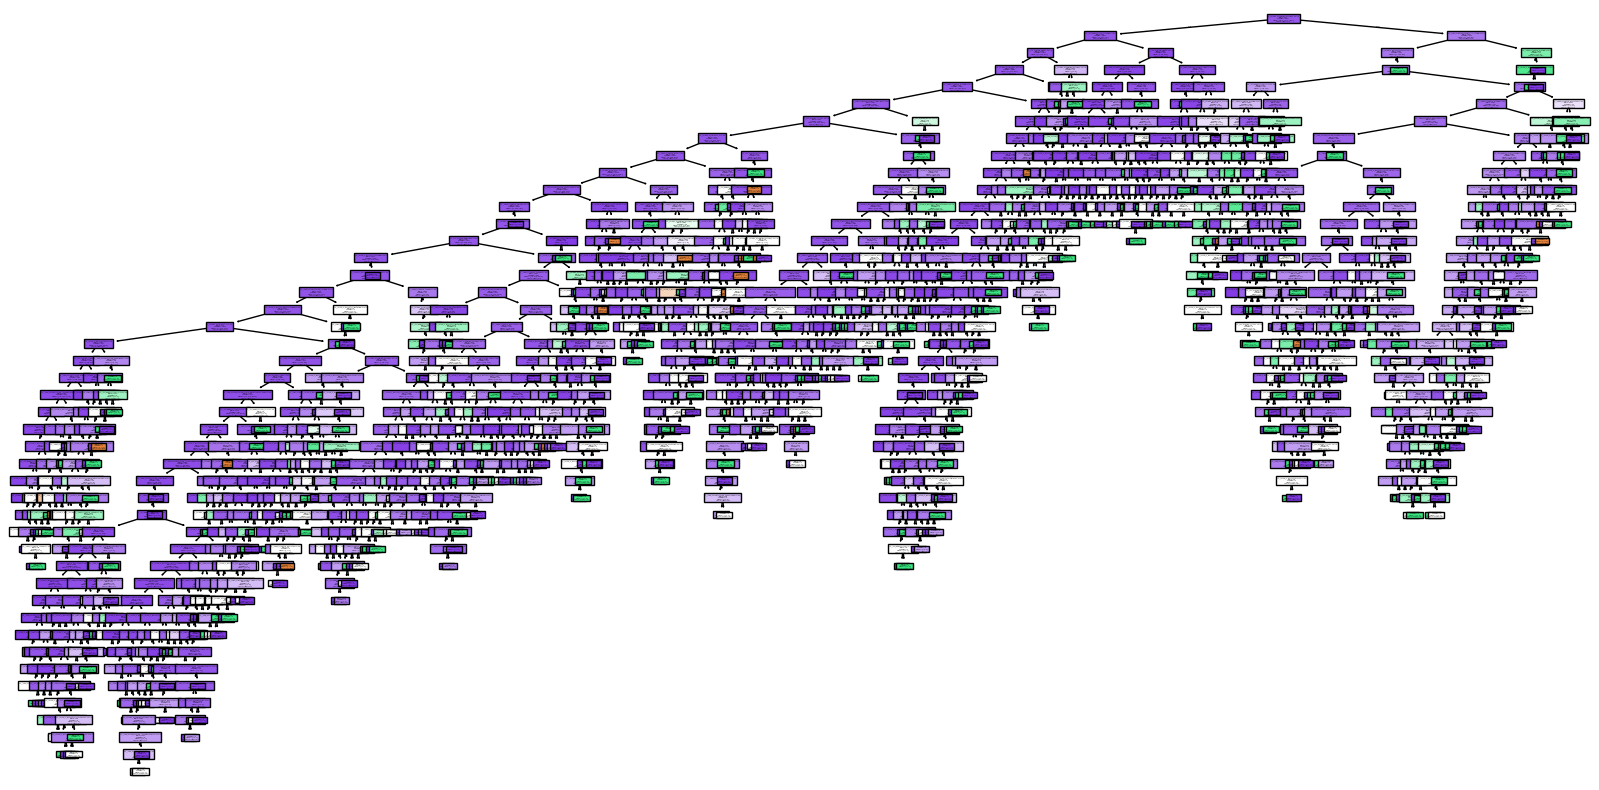

In [5]:


label_encoder = LabelEncoder()
df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])

X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']


categorical_variables = X.columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_variables)]
)

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)


cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)


y_pred = cart_model.predict(X_test)


def cart_report(test, pred):
    print("Accuracy: ", accuracy_score(test, pred))
    print("Confusion Matrix:\n", confusion_matrix(test, pred))
    print("Classification Report:\n", classification_report(test, pred))


cart_report(y_test, y_pred)


plt.figure(figsize=(20,10))
plot_tree(cart_model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=label_encoder.classes_.astype(str))
plt.show()

In [6]:
decoded_labels = label_encoder.inverse_transform(df['Accident_severity'])
print(decoded_labels)

['Slight Injury' 'Slight Injury' 'Serious Injury' ... 'Slight Injury'
 'Slight Injury' 'Slight Injury']


In [7]:
df['Accident_severity']
df['Accident_severity'].unique()

array([2, 1, 0])

Decoding target variable: 

- Slight Injury = 2
- Serious Injury = 1
- Fatal Injury = 0

In [8]:
df.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30,2
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50,2
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30,1
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30,2
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30,2


In [17]:
dtree_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dtree_accuracy}")
dtree_cm = confusion_matrix(y_test, y_pred)
print(multiclass_cm_metrics(dtree_cm))

Accuracy: 0.8627689809175801
Confusion Matrix:
[[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
                      Class 0  Class 1  Class 2
Accuracy              0.99026  0.87251  0.86277
Error rate            0.00974  0.12749  0.13723
Sensitivity (Recall)  0.00000  0.00000  1.00000
Specificity           1.00000  1.00000  0.00000
Precision             0.00000  0.00000  0.86277
F1                    0.00000  0.00000  0.92633
F2                    0.00000  0.00000  0.96917
F0.5                  0.00000  0.00000  0.88712


# Neural Network

In [28]:
X.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30


In [24]:
# label_encoder = LabelEncoder()
# df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])


X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']


categorical_variables = X.columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_variables)]
)


X_encoded = preprocessor.fit_transform(X)


def create_model(optimizer='adam', activation='relu', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model = KerasClassifier(model=create_model, verbose=0)


def nn_report(test, pred):
    print("Accuracy: ", accuracy_score(test, pred))
    print("Confusion Matrix:\n", confusion_matrix(test, pred))
    print("Classification Report:\n", classification_report(test, pred))

def cross_scores(score):
    print("Cross-validation scores: ", score)
    print("Average score: ", score.mean())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
scores = []

for train_index, test_index in sss.split(X_encoded, y):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train_encoded = to_categorical(y_train)
    y_test_encoded = to_categorical(y_test)

    nn_model = create_model()
    nn_model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

    y_pred_prob = nn_model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    scores.append(accuracy_score(y_test, y_pred))
    nn_report(y_test, y_pred)

cross_scores(np.array(scores))

Epoch 1/50


c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7632 - loss: 0.7232 - val_accuracy: 0.8696 - val_loss: 0.4253
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.5123 - val_accuracy: 0.8696 - val_loss: 0.4261
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.4985 - val_accuracy: 0.8696 - val_loss: 0.4128
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.4810 - val_accuracy: 0.8696 - val_loss: 0.4159
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.4729 - val_accuracy: 0.8696 - val_loss: 0.4164
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.4580 - val_accuracy: 0.8696 - val_loss: 0.4141
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.4565 - val_accuracy: 0.8696 - val_loss: 0.4130
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8554 - loss: 0.4575 - val_accuracy: 0.8696 - val_

c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6973 - loss: 0.8151 - val_accuracy: 0.8643 - val_loss: 0.4342
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8568 - loss: 0.5220 - val_accuracy: 0.8643 - val_loss: 0.4276
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.4861 - val_accuracy: 0.8643 - val_loss: 0.4256
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.4801 - val_accuracy: 0.8643 - val_loss: 0.4257
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.4684 - val_accuracy: 0.8643 - val_loss: 0.4233
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8627689809175801
Confusion Matrix:
 [[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00       314
           2       0.86      1.00      0.

c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6341 - loss: 0.8571 - val_accuracy: 0.8696 - val_loss: 0.4254
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.5373 - val_accuracy: 0.8696 - val_loss: 0.4178
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.5022 - val_accuracy: 0.8696 - val_loss: 0.4166
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.4784 - val_accuracy: 0.8696 - val_loss: 0.4162
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.4816 - val_accuracy: 0.8696 - val_loss: 0.4173
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8627689809175801
Confusion Matrix:
 [[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00       314
           2       0.86      1.00      0.

c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5780 - loss: 1.0014 - val_accuracy: 0.8661 - val_loss: 0.4823
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8488 - loss: 0.6002 - val_accuracy: 0.8661 - val_loss: 0.4344
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.5423 - val_accuracy: 0.8661 - val_loss: 0.4258
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.4975 - val_accuracy: 0.8661 - val_loss: 0.4310
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8601 - loss: 0.5094 - val_accuracy: 0.8661 - val_loss: 0.4264
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8627689809175801
Confusion Matrix:
 [[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00       314
           2       0.86      1.00      0.

c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7336 - loss: 0.7630 - val_accuracy: 0.8365 - val_loss: 0.5005
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.5450 - val_accuracy: 0.8365 - val_loss: 0.4927
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.4682 - val_accuracy: 0.8365 - val_loss: 0.4900
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8749 - loss: 0.4568 - val_accuracy: 0.8365 - val_loss: 0.4903
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8765 - loss: 0.4465 - val_accuracy: 0.8365 - val_loss: 0.4880
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8627689809175801
Confusion Matrix:
 [[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00       314
           2       0.86      1.00      0.

c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### Performance Metrics of last neural network iteration

Decoding target variable: 

- Slight Injury = 2
- Serious Injury = 1
- Fatal Injury = 0

In [27]:
nn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {nn_accuracy}")
neural_cm = confusion_matrix(y_test, y_pred)
nn_metrics = multiclass_cm_metrics(neural_cm)
print(nn_metrics)

Accuracy: 0.8627689809175801
Confusion Matrix:
[[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
                      Class 0  Class 1  Class 2
Accuracy              0.99026  0.87251  0.86277
Error rate            0.00974  0.12749  0.13723
Sensitivity (Recall)  0.00000  0.00000  1.00000
Specificity           1.00000  1.00000  0.00000
Precision             0.00000  0.00000  0.86277
F1                    0.00000  0.00000  0.92633
F2                    0.00000  0.00000  0.96917
F0.5                  0.00000  0.00000  0.88712
